# Retenção de profissionais de saúde

O presente código tem como objetivo 

## Leitura de bibliotecas necessárias para as análises

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Leitura dos dados necessários para análise

In [16]:
df = pd.read_csv(r"C:\Users\Lapei_Cigets\Documents\GitHub\retencao\0_dados\Médico_retencao_geral.csv",sep=";")
df = df[['regiao_saude','retencao_geral']]

df.head()

,regiao_saude,retencao_geral
0,27010,0.435182
1,27007,0.541969
2,27004,0.331931
3,27001,0.773167
4,27005,0.393377


In [61]:
hierarquia = pd.read_csv(r"C:\Users\Lapei_Cigets\Documents\GitHub\retencao\0_dados\hierarquia_atualizada.csv")

reg_saude = hierarquia[['regiao',
                        'uf_sigla',
                        'cod_regsaud',
                        'regiao_saude_pad']].drop_duplicates().reset_index(drop=True)
reg_saude

,regiao,uf_sigla,cod_regsaud,regiao_saude_pad
0,Região Norte,RO,11001,VALE DO JAMARI
1,Região Norte,RO,11003,CENTRAL
2,Região Norte,RO,11004,MADEIRA-MAMORE
3,Região Norte,RO,11005,ZONA DA MATA
4,Região Norte,AC,12001,ALTO ACRE
...,...,...,...,...
445,Região Norte,AM,13003,RIO MADEIRA
446,Região Norte,AP,16002,AREA NORTE
447,Região Sudeste,SP,35016,SAO PAULO
448,Região Sudeste,MG,31011,TRES PONTAS


In [44]:
# juntando dados para identificar a região de saúde, a unidade da federação e a região do país
df = df.merge(reg_saude, 
         how = 'left',
         left_on = 'regiao_saude',
         right_on= 'cod_regsaud')


## Gerando gráficos 

Primeiro vamos gerar um gráfico de boxplot por região. Percebe-se que a mediana das regiões Sul e Sudeste são as mais elevadas. 

C:\Users\Lapei_Cigets\AppData\Local\Temp\ipykernel_30384\970679909.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


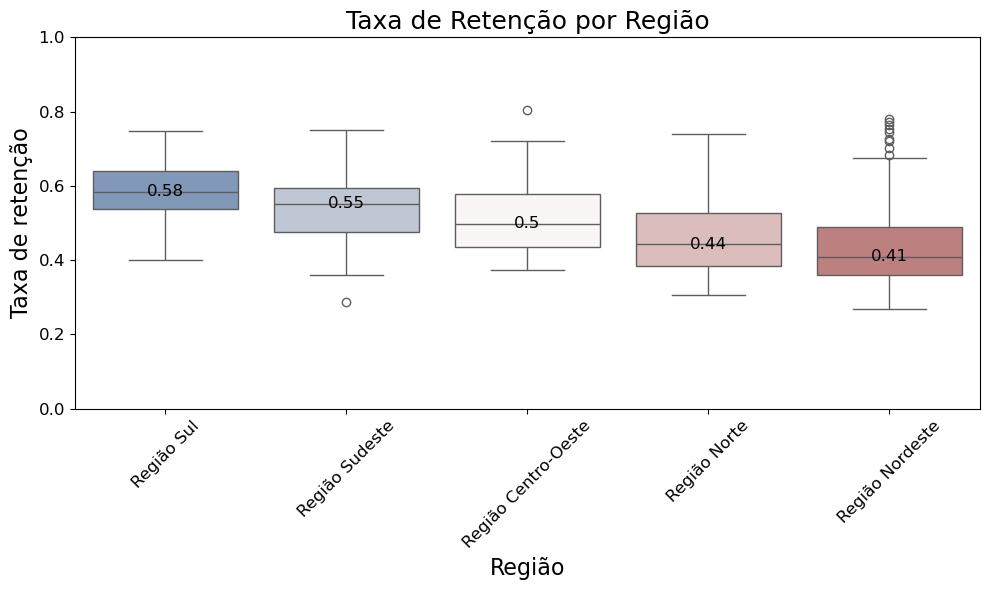

In [58]:


# Criando o gráfico
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, 
            x='regiao', 
            y='retencao_geral', 
            order=df.groupby('regiao')['retencao_geral'].median().sort_values(ascending=False).index,
            palette="vlag")

# customizando elementos do gráfico

plt.ylim(0, 1)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Região", fontsize=16)
plt.ylabel("Taxa de retenção", fontsize=16)
plt.title("Taxa de Retenção por Região", fontsize=18)
plt.tight_layout()

# calculando medianas para inserir valores no gráfico
medianas_regiao = df.groupby('regiao')['retencao_geral'].median().reset_index()
medianas_regiao = medianas_regiao.rename(columns={'retencao_geral': 'mediana'})

# Adicionando as medianas ao gráfico na posição correta

ordered_regions = df.groupby('regiao')['retencao_geral'].median().sort_values(ascending=False).index

for _, row in medianas_regiao.iterrows():
    x_position = list(ordered_regions).index(row['regiao'])  # Garantindo que a posição no eixo x esteja correta
    plt.text(x=x_position, y=row['mediana'], s=round(row['mediana'], 2), 
             ha='center', va='center', color='black', size=12)

plt.legend().set_visible(False)

plt.show()


O boxplot para unidades da federação ratificam os resultados anteriores. 

C:\Users\Lapei_Cigets\AppData\Local\Temp\ipykernel_30384\2201474136.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sem_df,


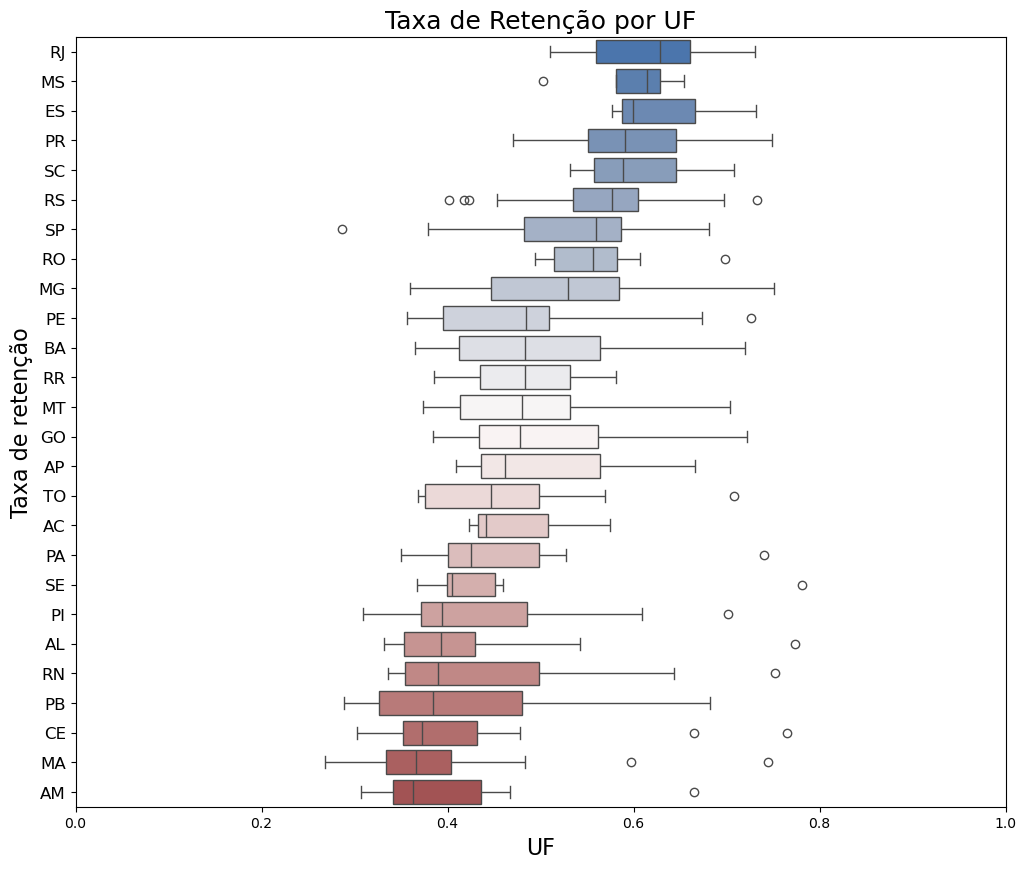

In [93]:
# retirando DF, pois não tem divisão por região de saúde na UF
df_sem_df = df[df['uf_sigla'] != 'DF']


plt.figure(figsize=(12, 10))
sns.boxplot(data=df_sem_df, 
            x='retencao_geral', 
            y='uf_sigla', 
            order=df_sem_df.groupby('uf_sigla')['retencao_geral'].median().sort_values(ascending=False).index,
            palette="vlag")

plt.xlim(0, 1)
plt.yticks(fontsize=12)
plt.xlabel("UF", fontsize=16)
plt.ylabel("Taxa de retenção", fontsize=16)
plt.title("Taxa de Retenção por UF", fontsize=18)

plt.show()

Retenção versus Densidade de Médicas por Populacional